In [1]:
# initial set up (the three lines we always have to start with)
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import the fastai vision library
from fastai.vision import *

In [3]:
from pathlib import Path
# create the appropriate path variable that points to the whales directory in your data directory
path = Path('data/expressions/fer2013')
path

PosixPath('data/expressions/fer2013')

In [4]:
import pandas as pd 
import numpy as np 
df_label = pd.read_csv(path/'fer2013.csv')

In [5]:
j = 0
while j < 35887:
    if df_label.loc[j, 'emotion'] == 5:
        df_label.loc[j, 'emotion'] = 2
    if df_label.loc[j, 'emotion'] == 6:
        df_label.loc[j, 'emotion'] = 4
    if df_label.loc[j, 'emotion'] == 1:
        df_label.loc[j, 'emotion'] = 0
    j += 1

In [6]:
df_label.drop(['pixels'],axis=1,inplace=True)

In [7]:
i = 28710
while i<35887:
    df_label.drop([i], inplace=True)
    i += 1

In [8]:
df_label.drop([28709], inplace=True)

In [9]:
df_label.drop(['Usage'],axis=1,inplace=True)

In [10]:
df_label.insert(0,'image', range(1,28710))


In [11]:
df_label['image'] = df_label['image'].astype(str)+'.jpg'

In [12]:
df_label.to_csv('data/expressions/fer2013/train.csv',index=False)

In [13]:
np.random.seed(42)
data = (ImageItemList.from_csv(path, 'train.csv', folder='Training')
       .random_split_by_pct(0.2)
       .label_from_df(cols='emotion')
       .databunch().normalize(imagenet_stats))

In [14]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


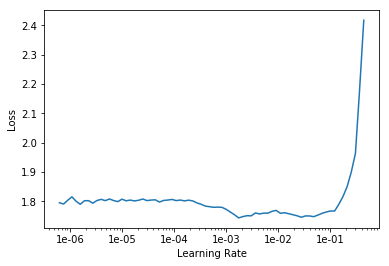

In [16]:
learn.recorder.plot()

In [17]:
lr = 0.5e-01

In [18]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.194712,1.133826,0.437554
2,1.102107,1.195045,0.458457
3,0.962197,0.990311,0.393137
4,0.849359,0.864618,0.338791
5,0.716893,0.825483,0.331127


In [19]:
learn.save('stage-1-rn50')

In [20]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


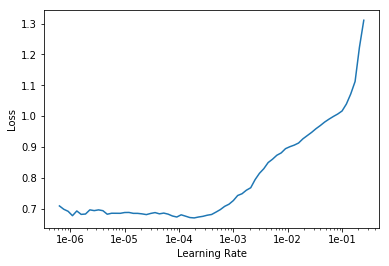

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(5, slice(1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.668516,0.824878,0.329559
2,0.666303,0.825664,0.331998
3,0.658406,0.827986,0.333043
4,0.651151,0.829021,0.331650
5,0.642228,0.830514,0.331475


In [23]:
learn.save('stage-2-rn50')